#**Loading MovieLens Dataset from Kaggle**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shubhammehta21/movie-lens-small-latest-dataset
!unzip movie-lens-small-latest-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset
License(s): unknown
Archive:  movie-lens-small-latest-dataset.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [ ]:
import pandas as pd
movies = pd.read_csv('/content/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
import pandas as pd
tags = pd.read_csv('/content/tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
#Create a list of genres and titles
titles = movies['title'].tolist()
genres = movies['genres'].str.split("|").tolist()

#**Steps of Building a CB Recommender System**

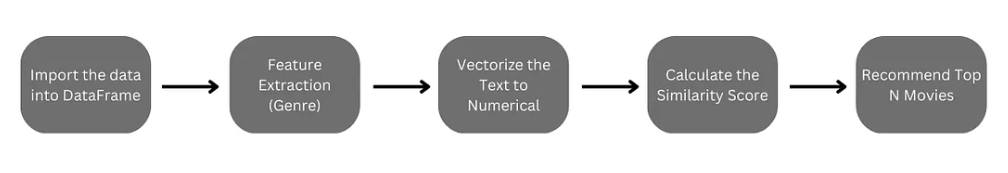



 # **1.   Binary Bag of Words**



In [ ]:
# Create a bag of words representation of the movie genres
def create_bow(genre_list):
    bow = {}
    for genre in genre_list:
        bow[genre] = 1
    return bow

In [ ]:
# Create a list of bags of words representations of the movie genres
bags_of_words = [create_bow(movie_genres) for movie_genres in genres]
bags_of_words

[{'Adventure': 1, 'Animation': 1, 'Children': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Adventure': 1, 'Children': 1, 'Fantasy': 1},
 {'Comedy': 1, 'Romance': 1},
 {'Comedy': 1, 'Drama': 1, 'Romance': 1},
 {'Comedy': 1},
 {'Action': 1, 'Crime': 1, 'Thriller': 1},
 {'Comedy': 1, 'Romance': 1},
 {'Adventure': 1, 'Children': 1},
 {'Action': 1},
 {'Action': 1, 'Adventure': 1, 'Thriller': 1},
 {'Comedy': 1, 'Drama': 1, 'Romance': 1},
 {'Comedy': 1, 'Horror': 1},
 {'Adventure': 1, 'Animation': 1, 'Children': 1},
 {'Drama': 1},
 {'Action': 1, 'Adventure': 1, 'Romance': 1},
 {'Crime': 1, 'Drama': 1},
 {'Drama': 1, 'Romance': 1},
 {'Comedy': 1},
 {'Comedy': 1},
 {'Action': 1, 'Comedy': 1, 'Crime': 1, 'Drama': 1, 'Thriller': 1},
 {'Comedy': 1, 'Crime': 1, 'Thriller': 1},
 {'Crime': 1, 'Drama': 1, 'Horror': 1, 'Mystery': 1, 'Thriller': 1},
 {'Action': 1, 'Crime': 1, 'Thriller': 1},
 {'Drama': 1, 'Sci-Fi': 1},
 {'Drama': 1, 'Romance': 1},
 {'Drama': 1},
 {'Children': 1, 'Drama': 1},
 {'Drama': 1, 'Romance

In [ ]:
# Create a dataframe to store the bags of words representation of the movie genres
genre_df = pd.DataFrame(bags_of_words, index=titles).fillna(0)
genre_df.head(5)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix between the movies
cosine_similarity = cosine_similarity(genre_df)

# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=genre_df.index, columns=genre_df.index)
similarity_df

,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
Toy Story (1995),1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
Jumanji (1995),0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
Grumpier Old Men (1995),0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
Waiting to Exhale (1995),0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
Father of the Bride Part II (1995),0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
No Game No Life: Zero (2017),0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
Flint (2017),0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000
Bungo Stray Dogs: Dead Apple (2018),0.316228,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.707107,0.408248,...,0.707107,0.500000,0.000000,0.707107,0.0,0.707107,0.408248,0.00000,1.000000,0.000000


In [ ]:
!pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.2 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import process

# Function to get the closest matching title
def get_closest_title(user_input, all_titles):
    closest = process.extractOne(user_input, all_titles)
    return closest[0]

# Ask the user to input a movie title
movie_input = input('Enter a movie you like: ')

# Find the closest match from the movie titles
best_match = get_closest_title(movie_input, similarity_df.index)

print(f"Matched movie title: {best_match}")

# Get the index of the matched movie in the similarity DataFrame
movie_index = similarity_df.index.get_loc(best_match)

# Get the top 10 most similar movies
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

# Display the recommendations
print(f'\nTop 10 movies similar to "{best_match}":')
print(top_10)

Enter a movie you like: GUMAJI
Matched movie title: Jumanji (1995)

Top 10 movies similar to "Jumanji (1995)":
title
NeverEnding Story, The (1984)                                             1.0
NeverEnding Story II: The Next Chapter, The (1990)                        1.0
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)    1.0
Golden Compass, The (2007)                                                1.0
Indian in the Cupboard, The (1995)                                        1.0
Water Horse: Legend of the Deep, The (2007)                               1.0
Alice in Wonderland (1933)                                                1.0
Pan (2015)                                                                1.0
Pete's Dragon (2016)                                                      1.0
Percy Jackson: Sea of Monsters (2013)                                     1.0
Name: Jumanji (1995), dtype: float64



 # **2.   Binary Feature Matrix**

In [ ]:
# Create a binary feature matrix for the genres
genre_matrix = pd.get_dummies(movies['genres'].str.split("|").apply(pd.Series).stack()).groupby(level=0).sum()
genre_matrix

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity = cosine_similarity(genre_matrix)

In [ ]:
from fuzzywuzzy import process

# Function to get the closest movie title using fuzzy matching
def get_closest_title(user_input, all_titles):
    match = process.extractOne(user_input, all_titles)
    return match[0]

# Function to get recommended movies along with similarity scores
def get_recommendations(title, top_n=10):
    # Find the index of the given title
    idx = movies[movies['title'] == title].index[0]

    # Get cosine similarity scores for the movie
    similarity_scores = list(enumerate(similarity[idx]))

    # Sort the scores in descending order (most similar first)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Skip the first one (it's the same movie) and keep top_n
    top_similar = similarity_scores[1:top_n+1]

    # Prepare list of (movie title, similarity score)
    recommendations = [(movies['title'].iloc[i], score) for i, score in top_similar]

    return recommendations

# Ask user for input
user_input = input("Enter a movie you like: ")

# Get the closest matching title
all_titles = movies['title'].tolist()
best_match = get_closest_title(user_input, all_titles)

print(f"\nMatched movie title: {best_match}")

# Get recommendations with similarity scores
recommendations = get_recommendations(best_match, top_n=10)

# Display the results
print(f"\nTop 10 recommendations for '{best_match}':")
for idx, (title, score) in enumerate(recommendations, start=1):
    print(f"{idx}. {title}   {score:.2f}")

Enter a movie you like: JUMAJI

Matched movie title: Jumanji (1995)

Top 10 recommendations for 'Jumanji (1995)':
1. Indian in the Cupboard, The (1995)   1.00
2. NeverEnding Story III, The (1994)   1.00
3. Escape to Witch Mountain (1975)   1.00
4. Darby O'Gill and the Little People (1959)   1.00
5. Return to Oz (1985)   1.00
6. NeverEnding Story, The (1984)   1.00
7. NeverEnding Story II: The Next Chapter, The (1990)   1.00
8. Santa Claus: The Movie (1985)   1.00
9. Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)   1.00
10. Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)   1.00



 # **3.   TF-IDF (Term Frequency-Inverse Document Frequency)**

### **1. Formula of TF:**

 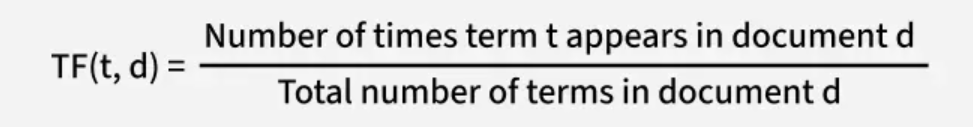

###**2. Formula of IDF:**

 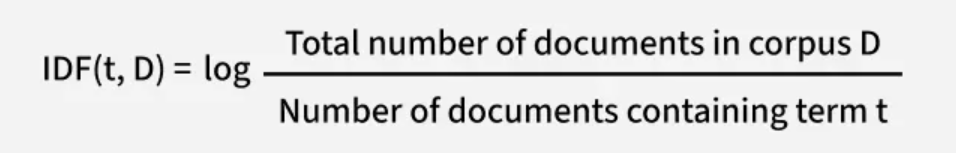

##**Using movies.csv**



In [ ]:
# Combine the genres for each movie into a single string
genres_combined = movies['genres'].str.replace('|', ' ')
genres_combined

,genres
0,Adventure Animation Children Comedy Fantasy
1,Adventure Children Fantasy
2,Comedy Romance
3,Comedy Drama Romance
4,Comedy
...,...
9737,Action Animation Comedy Fantasy
9738,Animation Comedy Fantasy
9739,Drama
9740,Action Animation


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object to transform the movie genres into a Tf-idf representation
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(genres_combined)
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 23219 stored elements and shape (9742, 24)>

In [ ]:
import pandas as pd

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Convert the sparse matrix to a dense array
dense_matrix = tfidf_matrix.toarray()

# Create a DataFrame with the titles as index and features as columns
tfidf_df = pd.DataFrame(dense_matrix, columns=feature_names, index=titles)

# Show the first 5 rows
tfidf_df.head(5)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
Toy Story (1995),0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Jumanji (1995),0.0,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.0,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Calculate the cosine similarity matrix between the movies
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(tfidf_matrix)

In [ ]:
# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=movies['title'], columns=movies['title'])
similarity_df

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.813578,0.152769,0.135135,0.267586,0.000000,0.152769,0.654698,0.000000,0.262413,...,0.360397,0.465621,0.196578,0.516225,0.0,0.680258,0.755891,0.000000,0.421037,0.267586
Jumanji (1995),0.813578,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804715,0.000000,0.322542,...,0.000000,0.000000,0.000000,0.000000,0.0,0.341376,0.379331,0.000000,0.000000,0.000000
Grumpier Old Men (1995),0.152769,0.000000,1.000000,0.884571,0.570915,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.162848,0.000000,0.419413,0.000000,0.0,0.181883,0.202105,0.000000,0.000000,0.570915
Waiting to Exhale (1995),0.135135,0.000000,0.884571,1.000000,0.505015,0.000000,0.884571,0.000000,0.000000,0.000000,...,0.144051,0.201391,0.687440,0.000000,0.0,0.160888,0.178776,0.466405,0.000000,0.505015
Father of the Bride Part II (1995),0.267586,0.000000,0.570915,0.505015,1.000000,0.000000,0.570915,0.000000,0.000000,0.000000,...,0.285240,0.000000,0.734632,0.000000,0.0,0.318581,0.354002,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.680258,0.341376,0.181883,0.160888,0.318581,0.239513,0.181883,0.000000,0.436010,0.241142,...,0.599288,0.554355,0.234040,0.614603,0.0,1.000000,0.899942,0.000000,0.753553,0.318581
No Game No Life: Zero (2017),0.755891,0.379331,0.202105,0.178776,0.354002,0.000000,0.202105,0.000000,0.000000,0.000000,...,0.476784,0.615990,0.260061,0.682937,0.0,0.899942,1.000000,0.000000,0.557008,0.354002
Flint (2017),0.000000,0.000000,0.000000,0.466405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.431794,0.678466,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
from fuzzywuzzy import process

# Ask the user for a movie they like
user_input = input("Enter a movie you like: ")


# 'similarity_df.index' should contain your movie titles
best_match, score = process.extractOne(user_input, similarity_df.index)

# Notify the user which movie was matched
print(f"\nMatched movie title: {best_match} (Match score: {score})")

# Find the index of the matched movie
movie_index = similarity_df.index.get_loc(best_match)

# Get the top 10 most similar movies
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:20]

# The recommendations with similarity scores
print(f"\nTop 10 similar movies to \"{best_match}\":")
for title, sim_score in top_10.items():
    print(f"{title}  {sim_score:.2f}")

Enter a movie you like: JUMANJI

Matched movie title: Jumanji (1995) (Match score: 90)

Top 10 similar movies to "Jumanji (1995)":
NeverEnding Story, The (1984)  1.00
NeverEnding Story II: The Next Chapter, The (1990)  1.00
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)  1.00
Golden Compass, The (2007)  1.00
Indian in the Cupboard, The (1995)  1.00
Water Horse: Legend of the Deep, The (2007)  1.00
Alice in Wonderland (1933)  1.00
Pan (2015)  1.00
Pete's Dragon (2016)  1.00
Percy Jackson: Sea of Monsters (2013)  1.00
Seventh Son (2014)  1.00
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)  1.00
Escape to Witch Mountain (1975)  1.00
NeverEnding Story III, The (1994)  1.00
The Cave of the Golden Rose (1991)  1.00
Chronicles of Narnia: Prince Caspian, The (2008)  1.00
Santa Claus: The Movie (1985)  1.00
Return to Oz (1985)  1.00
Chronicles of Narnia: The Voyage of the Dawn Treader, The (2010)  1.00


##**Combining movies.csv and tags.csv**







In [ ]:
# Combine all tags per movie into a single string (we'll group by movieId and join all tags into a big "tag sentence")
tags_grouped = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()
tags_grouped

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake
...,...,...
1567,183611,Comedy funny Rachel McAdams
1568,184471,adventure Alicia Vikander video game adaptation
1569,187593,Josh Brolin Ryan Reynolds sarcasm
1570,187595,Emilia Clarke star wars


In [ ]:
# Merge the movies and tags dataframes on movieId
movies_with_tags = pd.merge(movies, tags_grouped, on='movieId', how='left')
movies_with_tags

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN
9739,193585,Flint (2017),Drama,NaN
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN


In [ ]:
# Combine genres and tags into one 'combined' text feature and replace '|' by space to treat each genre as a separate word
movies_with_tags['genres'] = movies_with_tags['genres'].str.replace('|', ' ', regex=False)
movies_with_tags['combined'] = movies_with_tags['genres'].fillna('') + ' ' + movies_with_tags['tag'].fillna('')
movies_with_tags

,movieId,title,genres,tag,combined
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,Comedy Romance moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,NaN,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,Comedy pregnancy remake
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,NaN,Action Animation Comedy Fantasy
9738,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,NaN,Animation Comedy Fantasy
9739,193585,Flint (2017),Drama,NaN,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,NaN,Action Animation


In [ ]:
# Apply TF-IDF Vectorizer on the combined column
tfidf = TfidfVectorizer(stop_words='english')  # remove common words like "the", "a", etc.
tfidf_matrix = tfidf.fit_transform(movies_with_tags['combined'])

In [ ]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
from fuzzywuzzy import process

# Ask the user to enter a movie title
user_input = input("Enter a movie you like: ")

# Find best fuzzy match for the title
all_titles = movies_with_tags['title'].tolist()
best_match, match_score = process.extractOne(user_input, all_titles)

# Notify the user which title was matched
print(f'\nMatched movie title: "{best_match}" (Match score: {match_score})')

# Get index of the matched movie
idx = movies_with_tags[movies_with_tags['title'] == best_match].index[0]

# Compute cosine similarity scores
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

# Display recommendations
print(f'\nTop 10 recommendations for "{best_match}":')
for i, score in sim_scores:
    title = movies_with_tags.iloc[i]['title']
    print(f"{title}  {round(score, 2)}")

Enter a movie you like: Jumanji

Matched movie title: "Jumanji (1995)" (Match score: 90)

Top 10 recommendations for "Jumanji (1995)":
Tomb Raider (2018)  0.36
Night at the Museum (2006)  0.35
Indian in the Cupboard, The (1995)  0.3
NeverEnding Story III, The (1994)  0.3
Escape to Witch Mountain (1975)  0.3
Darby O'Gill and the Little People (1959)  0.3
Return to Oz (1985)  0.3
NeverEnding Story, The (1984)  0.3
NeverEnding Story II: The Next Chapter, The (1990)  0.3
Santa Claus: The Movie (1985)  0.3
